In [1]:
# ignore warnings
import sys
import warnings
from IPython.display import clear_output
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
# statistics and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pre-processing
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# modelling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# metrics
from sklearn.metrics import roc_auc_score,roc_curve
# model saving
import pickle

%matplotlib inline

In [3]:
X_train = pd.read_csv('Training/X_train.csv', index_col='Unique_ID')
Y_train = pd.read_csv('Training/y_train.csv', index_col='Unique_ID')
X_test = pd.read_csv('Test/X_test.csv', index_col='Unique_ID')

In [4]:
X_train.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
Unique_ID,,,,,,,,,,,,,,,,,,,,,
Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [5]:
def missing_value_columns(df):
    '''It will return the columns from df which have missing values
    
    keyword arguments:
    df -- the data frame'''
    isnull_series = df.isnull().sum()
    return isnull_series[isnull_series>0].index

In [6]:
def explorer(header, df):
    '''Prints info, description and percent of missing values and column name containing missing values
    for the given table.

    Keyword arguments:
    header -- the table name
    df -- the data frame'''
    
    print(F'*****{header} info*****:')
    print('\nData types:\n')
    df.info();
    print()   
    print('\nGeneral description:')
    display(df.describe())
    print('\nPercentage of missing values:\n')
    columns = missing_value_columns(df)
    if len(missing_value_columns(df).values) == 0:
        print('There is no missing values')
    else:
        print((df.isna().sum()*100/len(df))[columns])
    print('')

In [7]:
explorer('X_train',X_train)

*****X_train info*****:

Data types:

<class 'pandas.core.frame.DataFrame'>
Index: 33050 entries, Candidate_5926 to Candidate_4714
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      33050 non-null  int64  
 1   C2      33050 non-null  int64  
 2   C3      33050 non-null  int64  
 3   C4      33050 non-null  int64  
 4   C5      33050 non-null  int64  
 5   C6      33050 non-null  bool   
 6   C7      33050 non-null  int64  
 7   C8      33050 non-null  bool   
 8   N1      33050 non-null  float64
 9   N2      28438 non-null  float64
 10  N3      32685 non-null  float64
 11  N4      28444 non-null  float64
 12  N5      28444 non-null  float64
 13  N6      32685 non-null  float64
 14  N7      32623 non-null  float64
 15  N8      33050 non-null  int64  
 16  N9      33050 non-null  int64  
 17  N10     32623 non-null  float64
 18  N10.1   32623 non-null  float64
 19  N11     32334 non-null  float64
 20  N12     28436 non

,C1,C2,C3,C4,C5,C7,N1,N2,N3,N4,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,28438.000000,32685.000000,28444.000000,...,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6220.000000,33050.000000,33050.000000,32623.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,3.124932,19.97653,81.342710,3.359361,9.574075,...,20.084197,19.512199,0.526391,0.045288,7192.813526,2379.621620,0.744373,125.629394,224.313536,19.587254
std,0.399382,3.399024,12.013457,15.527474,1.320860,2.158905,8.11087,85.397795,0.411040,5.584756,...,16.045120,15.637882,2.144069,0.443838,6460.139952,3379.065104,50.764684,104.391919,186.513844,7.352667
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-194.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.45000,21.000000,3.200000,6.000000,...,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-31.000000,54.000000,98.740000,14.000000
50%,1.000000,1.000000,10.000000,10.000000,2.000000,4.000000,19.27500,53.000000,3.400000,9.000000,...,15.000000,14.000000,0.000000,0.000000,5000.000000,1108.440000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,4.000000,26.90000,112.000000,3.600000,13.000000,...,28.000000,27.000000,0.000000,0.000000,9500.000000,3408.750000,32.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,7.000000,48.00000,755.000000,4.400000,59.000000,...,120.000000,111.000000,42.000000,11.000000,60001.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000



Percentage of missing values:

N2       13.954614
N3        1.104387
N4       13.936460
N5       13.936460
N6        1.104387
N7        1.291982
N10       1.291982
N10.1     1.291982
N11       2.166415
N12      13.960666
N14       1.839637
N15       1.291982
N16      13.936460
N17      13.936460
N18      13.936460
N19      13.830560
N20      13.830560
N21      13.830560
N22      13.830560
N23       7.521936
N25      81.025719
N26      81.025719
N27      81.025719
N28      81.025719
N29      81.025719
N30      81.025719
N31      81.025719
N32      81.180030
N35       1.291982
dtype: float64



Observations:<br>
- To many missing values in columns N25,N26,N27,N28,N29,N30,N31,N32
- we are removing these columns from train_data

In [8]:
columns_to_drop = ['N25','N26','N27','N28','N29','N30','N31','N32']
X_train.drop(columns_to_drop, axis =1,inplace = True)

In [9]:
columns = ['C1','C2','C3','C4','C5','C7']
for col in columns:
    print('Total number of unique values in column',col,'are',len(X_train[col].unique()))

Total number of unique values in column C1 are 3
Total number of unique values in column C2 are 21
Total number of unique values in column C3 are 52
Total number of unique values in column C4 are 68
Total number of unique values in column C5 are 8
Total number of unique values in column C7 are 8


Problems:
- we don't have data description
- We don't know about categorical columns C1,C2,C3,C4,C5,C7. 
- Are they Nominal or ordinal?

Assumptions:
- For the simplycity I'm assuming these columns are ordinal (having order)
- We are going forward with label encoding not one hot encoding.

In [10]:
def impute_missing_values(df, imputer_object = None):
    '''It will return the dataframe after imputing missing values and after doing label encoding of 
    categorical column in dataframe
    Imputer object is useful for test set
    
    keyword arguments:
    df -- the data frame
    imputer_object -- sklearn.impute._knn.KNNImputer object, it is useful for test set'''
    if imputer_object:
        imputed_data = imputer_object.transform(df)
    else:
        imputer_object = KNNImputer(n_neighbors=3)
        imputed_data = imputer_object.fit_transform(df)
    imputed_data = pd.DataFrame(imputed_data, columns = df.columns, index = df.index)
    return imputed_data,imputer_object

In [11]:
X_train, imputer_object_for_test_set = impute_missing_values(X_train)

In [12]:
X_train.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
Unique_ID,,,,,,,,,,,,,,,,,,,,,
Candidate_5926,1.0,0.0,11.0,31.0,0.0,0.0,0.0,1.0,23.75,9.0,...,0.000000,0.000000,3.666667,0.543333,0.333333,27.816,1750.000000,58.0,113.39,12.0
Candidate_48134,1.0,4.0,2.0,66.0,2.0,0.0,1.0,1.0,11.05,22.0,...,0.060000,25856.000000,17.000000,0.880000,1.000000,40.000,10833.333330,160.0,262.10,17.0
Candidate_51717,1.0,0.0,19.0,2.0,0.0,0.0,0.0,1.0,29.00,90.0,...,0.143333,474.333333,22.333333,0.623333,0.666667,20.000,6250.000000,24.0,50.29,18.0
Candidate_26401,1.0,1.0,16.0,47.0,1.0,0.0,4.0,1.0,17.99,1.0,...,0.890000,1006.000000,6.000000,1.000000,0.000000,26.000,2413.666667,70.0,126.52,27.0
Candidate_34872,1.0,1.0,13.0,1.0,1.0,1.0,6.0,1.0,27.50,206.0,...,0.970000,3398.000000,31.000000,0.960000,0.000000,44.000,7666.666667,100.0,205.47,21.0


In [13]:
explorer('X_train',X_train)

*****X_train info*****:

Data types:

<class 'pandas.core.frame.DataFrame'>
Index: 33050 entries, Candidate_5926 to Candidate_4714
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      33050 non-null  float64
 1   C2      33050 non-null  float64
 2   C3      33050 non-null  float64
 3   C4      33050 non-null  float64
 4   C5      33050 non-null  float64
 5   C6      33050 non-null  float64
 6   C7      33050 non-null  float64
 7   C8      33050 non-null  float64
 8   N1      33050 non-null  float64
 9   N2      33050 non-null  float64
 10  N3      33050 non-null  float64
 11  N4      33050 non-null  float64
 12  N5      33050 non-null  float64
 13  N6      33050 non-null  float64
 14  N7      33050 non-null  float64
 15  N8      33050 non-null  float64
 16  N9      33050 non-null  float64
 17  N10     33050 non-null  float64
 18  N10.1   33050 non-null  float64
 19  N11     33050 non-null  float64
 20  N12     33050 non

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,33050.000000,...,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,0.467958,3.124932,0.923328,19.97653,79.791750,...,0.513106,10617.553374,21.132123,0.848410,0.889007,78.875101,5050.306727,125.629394,224.313536,19.577872
std,0.399382,3.399024,12.013457,15.527474,1.320860,0.498980,2.158905,0.266074,8.11087,81.439713,...,0.342280,21065.909784,12.126540,0.171657,1.166497,227.000809,6237.726330,104.391919,186.513844,7.321054
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,13.45000,22.666667,...,0.210000,542.000000,12.000000,0.760000,0.000000,26.000000,2833.333333,54.000000,98.740000,14.666667
50%,1.000000,1.000000,10.000000,10.000000,2.000000,0.000000,4.000000,1.000000,19.27500,53.666667,...,0.530000,3324.666667,19.000000,0.900000,0.666667,40.000000,4166.666667,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,1.000000,4.000000,1.000000,26.90000,109.000000,...,0.820000,11938.500000,28.000000,1.000000,1.000000,62.000000,6250.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,1.000000,7.000000,1.000000,48.00000,755.000000,...,5.830000,646285.000000,114.000000,1.000000,20.000000,2002.000000,618547.833300,700.000000,2153.380000,64.000000



Percentage of missing values:

There is no missing values



In [14]:
train_data = pd.concat([X_train, Y_train], axis = 1)

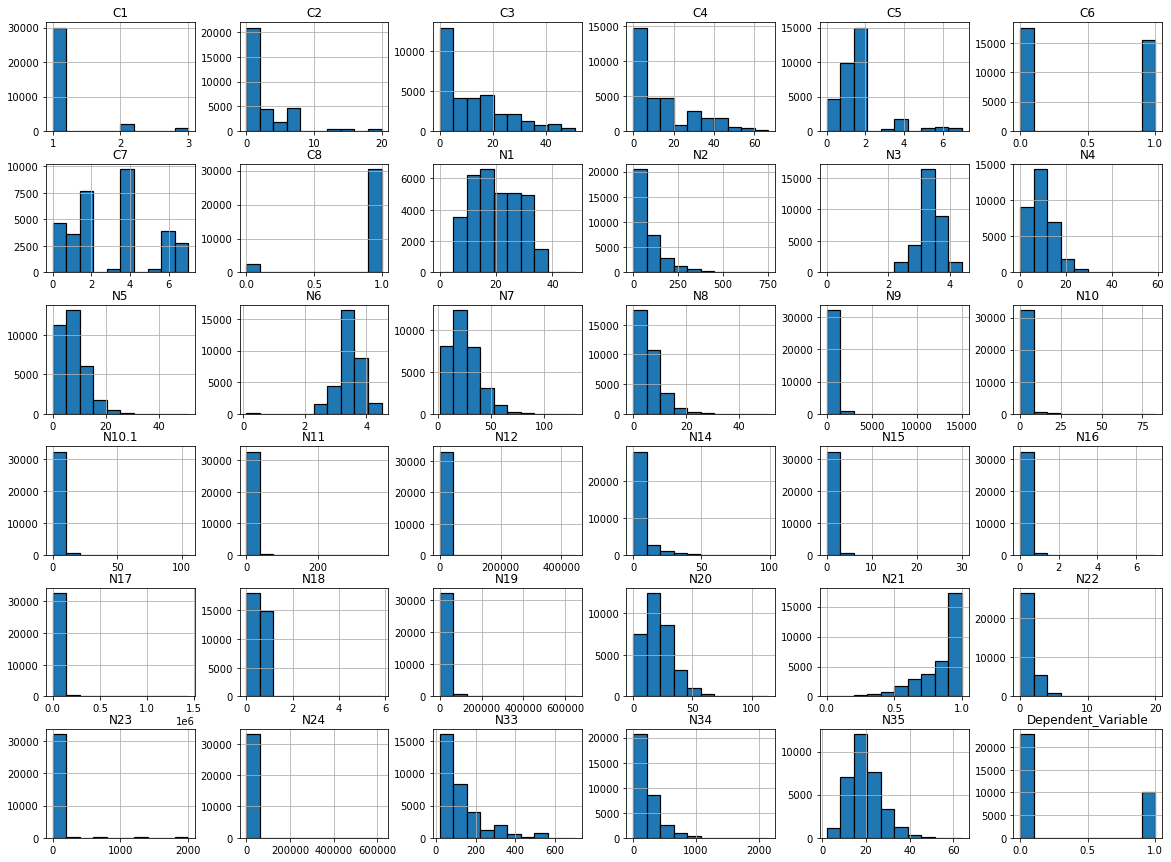

In [15]:
train_data.hist(edgecolor='black', linewidth=1.2, figsize=(20,15));

Observations:
- Most of the columns are imbalanced

In [16]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, threshold = 0.8):
    '''Get the required columns having correlation more than threshold'''
    abs_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    abs_corr = abs_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    corr_required = abs_corr[abs_corr > threshold]
    print("Top Absolute Correlations")
    print(corr_required)

In [17]:
get_top_abs_correlations(train_data,0.6)

Top Absolute Correlations
N3     N6     1.000000
N4     N5     0.958839
N33    N34    0.930203
N7     N20    0.899402
N5     N8     0.875329
N4     N8     0.841791
N9     N17    0.787644
N10.1  N11    0.748481
N4     N20    0.711771
N5     N20    0.666855
N4     N7     0.622668
dtype: float64


Observation:
- It is showing there is high correlations between features
- Pairs of columns very much dependent are - (N3,N6), (N4,N5), (N33,N34)
- There is no column which is highly correlated with dependent variable
- We will drop N6,N5,N34 columns

In [18]:
columns_to_drop_after_imputing =['N6','N5','N34']

In [19]:
features = X_train.drop(columns=columns_to_drop_after_imputing, errors='ignore')

In [20]:
scaler = StandardScaler()
x = scaler.fit_transform(features)
pca = PCA(0.98)
pca.fit_transform(x).shape

(33050, 28)

Obeservation:

- 98% of information retrieved with only 28 components
- Since we have no column description PCA is a better choice
- We will use PCA during training to extract the most of the information from the data

In [21]:
features_train, features_val, target_train, target_val = train_test_split(features, Y_train, test_size=0.15, random_state=12345)

In [22]:
def model_eval(model_name, param_grid, model_headline : str, features_train, target_train, features_test, target_test):
    '''
    Creates a pipeline with PCA and standard scaling and the given model.
    Runs a hyper paramer tuning with cross validation on the train set with the given hyperparameters.
    Predicts on the test set. (use predict proba on possibe models).
    Prints the model's roc_auc_curve and roc_auc_score.
    Returns the trained model object.
    
    keyword arguments:
    model_name -- model object
    grid_params -- parameters for grid search
    model_headline -- str, to show headline
    '''
    
    # creating a pipeline
    steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=.98)),
         ('model', model_name)]
    pipe = Pipeline(steps)
    # gridsearchcv model
    model = GridSearchCV(pipe, param_grid=param_grid , cv=3, scoring= 'roc_auc', verbose =10)
    model.fit(features_train, target_train)
    clear_output()
    # prediction
    target_proba = model.predict_proba(features_test)[:,1]
    # roc_auc_score and curve
    print('\033[1m' + model_headline)
    score = roc_auc_score(target_test,target_proba)
    print('roc_auc_score is: ', score)
    fpr,tpr,roc_thresholds = roc_curve(target_test, target_proba)
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(target_test))]
    p_fpr, p_tpr, _ = roc_curve(target_test, random_probs, pos_label=1)
    # plot roc curves
    plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    return model

### Logistic Regression

In [23]:
param_grid = {"model__C":np.logspace(-3,3,5), "model__penalty":["l1","l2",'elasticnet', 'none'],
              'model__solver':['lbfgs', 'liblinear','saga']}

Logistic Regression
roc_auc_score is:  0.7414505525111823


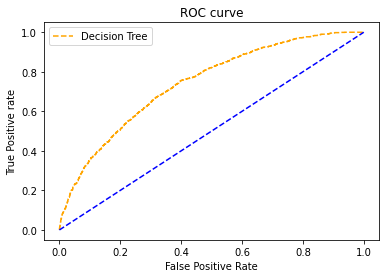

In [24]:
logistic_model = model_eval(LogisticRegression(),param_grid,'Logistic Regression',
                            features_train,target_train,features_val,target_val)

### KNN

In [25]:
param_grid = {"model__n_neighbors":range(2,10), "model__weights":['uniform', 'distance'],
              'model__p': [1,2]}

KNN
roc_auc_score is:  0.6913544964618128


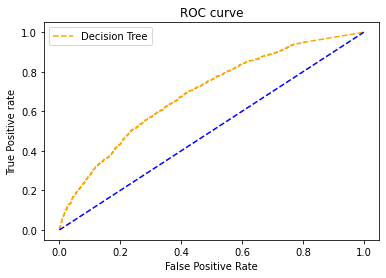

In [26]:
knn_model = model_eval(KNeighborsClassifier(),param_grid,'KNN',
                            features_train,target_train,features_val,target_val)

### Decision Tree

In [27]:
param_grid = {'model__splitter': ['best','random'],
               'model__criterion': ['gini','entropy'],
               'model__max_features': range(1,10),
               'model__min_samples_leaf': range(1,10)
    }

Decision Tree
roc_auc_score is:  0.6458080711566534


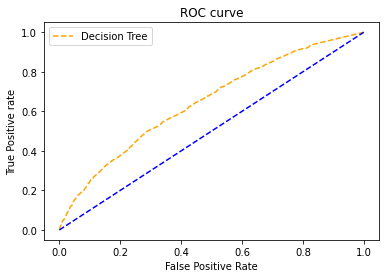

In [28]:
tree_model = model_eval(DecisionTreeClassifier(),param_grid,'Decision Tree',
                        features_train,target_train,features_val,target_val)

### Random Forest

In [29]:
param_grid = {'model__n_estimators': [50,100,200],
              'model__criterion': ['gini','entropy'],
               'model__max_depth': [1,2,5,10],
               'model__min_samples_leaf': range(5,10)}

Random Forest
roc_auc_score is:  0.7376802354085764


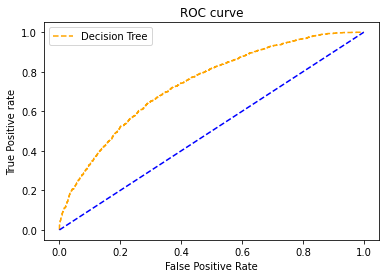

In [30]:
rf_model = model_eval(RandomForestClassifier(),param_grid,'Random Forest',
                        features_train,target_train,features_val,target_val)

### Gradient Boost Classifier

In [31]:
param_grid = {'model__n_estimators': [50,100,200],
               'model__max_depth': [1,2,5,10],
               'model__min_samples_leaf': range(1,5)}

Gradient Boos
roc_auc_score is:  0.7415764210374894


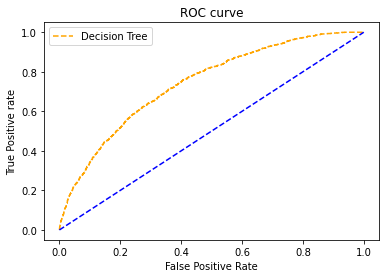

In [32]:
gb_model = model_eval(GradientBoostingClassifier(),param_grid,'Gradient Boost',
                        features_train,target_train,features_val,target_val)

### Final Model

Observation:
- Logistic Regression and Gradient Boost is giving the almost same accuracy
- we will proceed with gradient Boost classifier

In [33]:
gb_model.best_params_

{'model__max_depth': 5,
 'model__min_samples_leaf': 3,
 'model__n_estimators': 100}

### Prediction with test set

In [35]:
X_test = X_test.drop(columns = columns_to_drop)

In [36]:
X_test, imputer_object = impute_missing_values(X_test, imputer_object_for_test_set)

In [38]:
X_test = X_test.drop(columns=columns_to_drop_after_imputing)

In [42]:
proba = gb_model.predict_proba(X_test)

In [43]:
class_1_proba = proba[:,1]

In [44]:
final_predictions_df = pd.DataFrame({'Unique_ID': X_test.index, 'Class_1_Probability': class_1_proba})

In [45]:
final_predictions_df.to_csv('Test/final_predictions.csv', index = False)

### Saving the model

In [46]:
filename = 'final_model.sav'
pickle.dump(gb_model, open(filename, 'wb'))